***CHARMI YASHWANT KANANI***

***GO_STP_755***

# ***TASK 9***

Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle. 


Link: https://www.kaggle.com/giripujar/hr-analytics


First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.shape

(14999, 10)

In [5]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

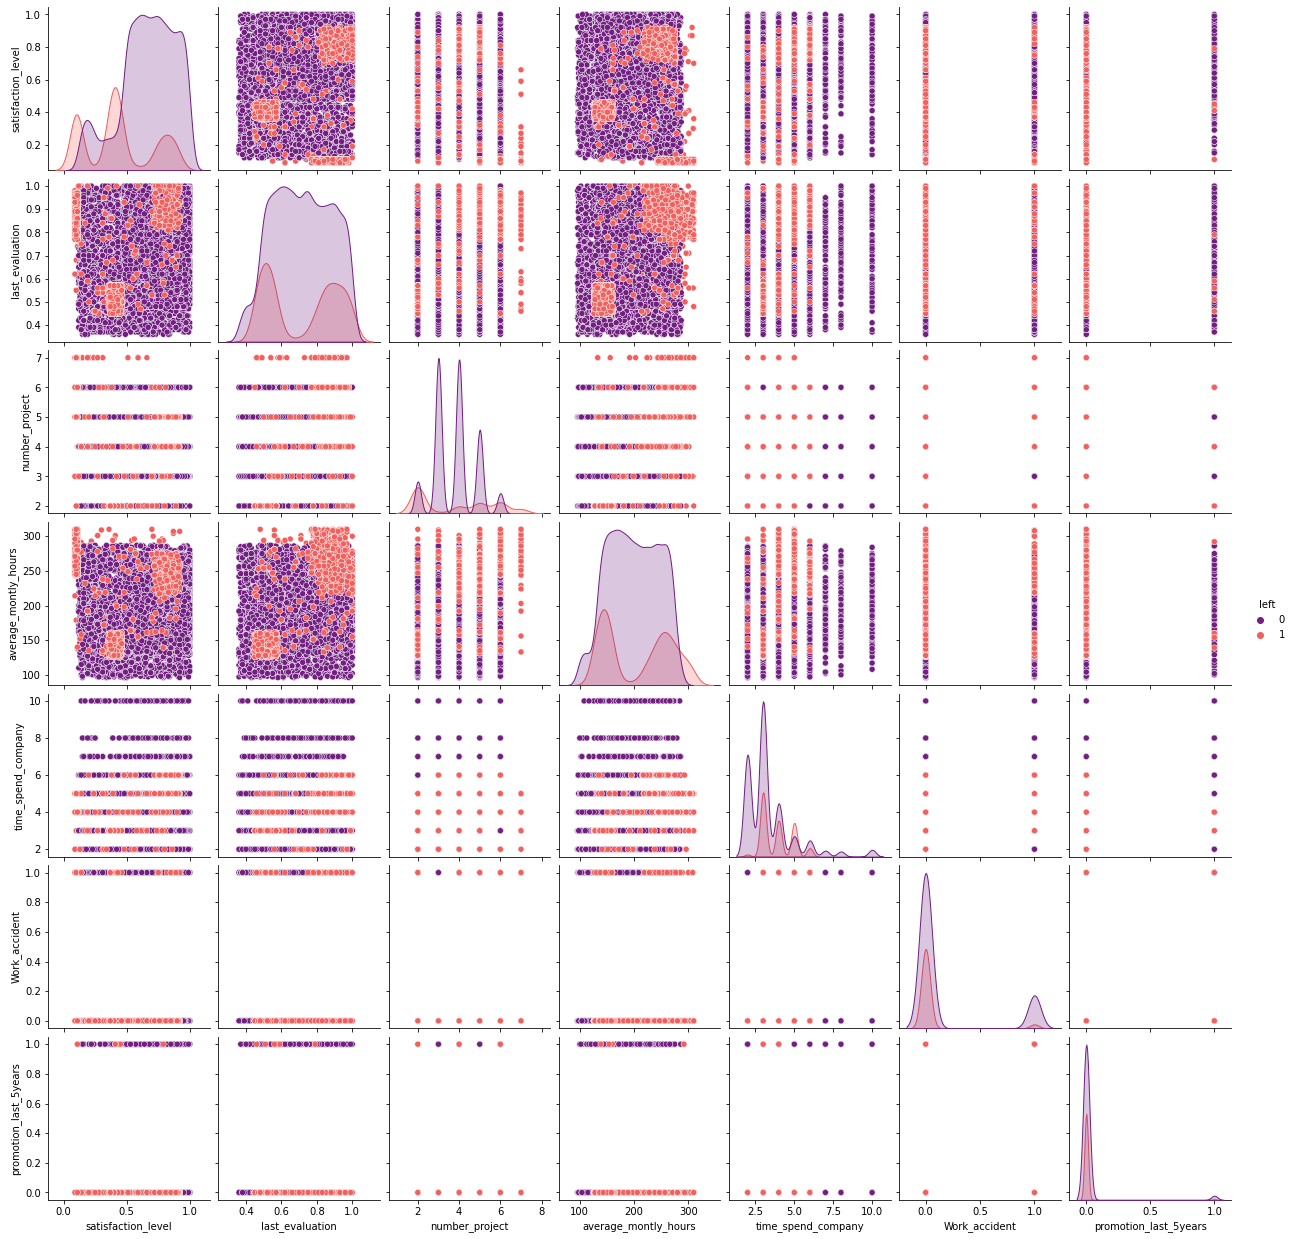

In [7]:
sns.pairplot(df, hue = 'left', palette = 'magma')

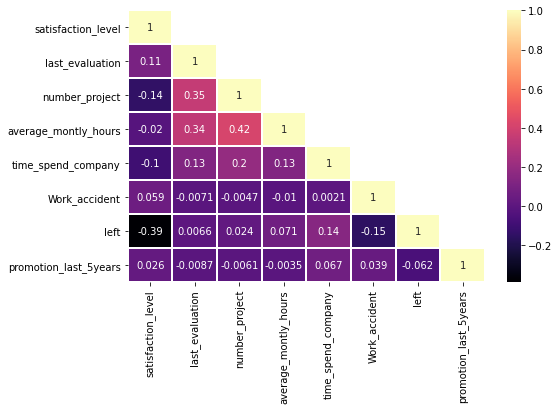

In [8]:
plt.figure(figsize = (8,5)) 
cor = df.corr()
np.tril(np.ones(cor.shape)).astype(np.bool)[0:8,0:8]
Lower_M = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(Lower_M,cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)
plt.show()

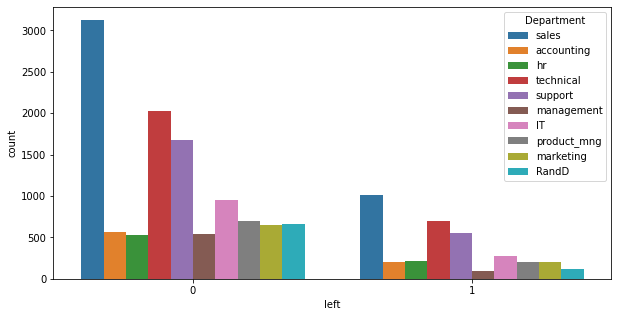

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'left', hue = 'Department', data = df) 

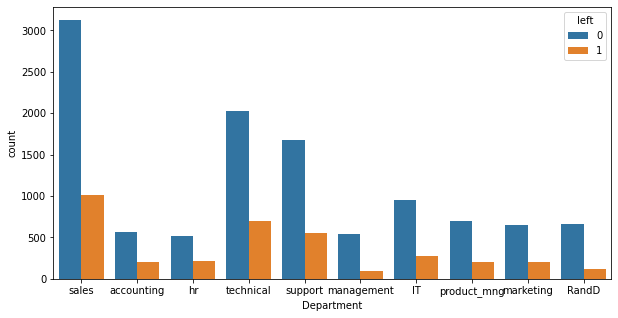

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Department', hue = 'left', data = df)

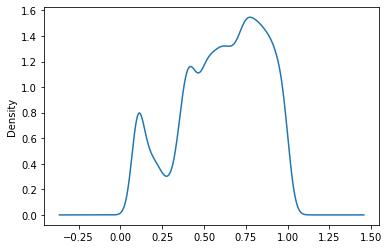

In [11]:
df['satisfaction_level'].plot.kde()

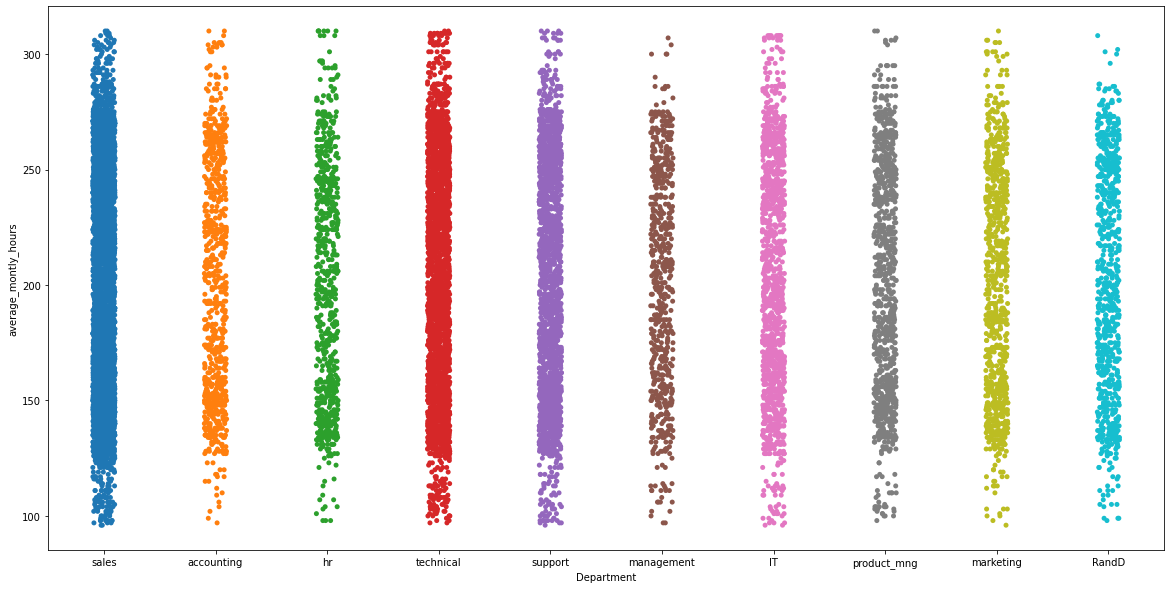

In [12]:
plt.figure(figsize = (20,10))
sns.stripplot(x = 'Department', y = 'average_montly_hours', data = df)

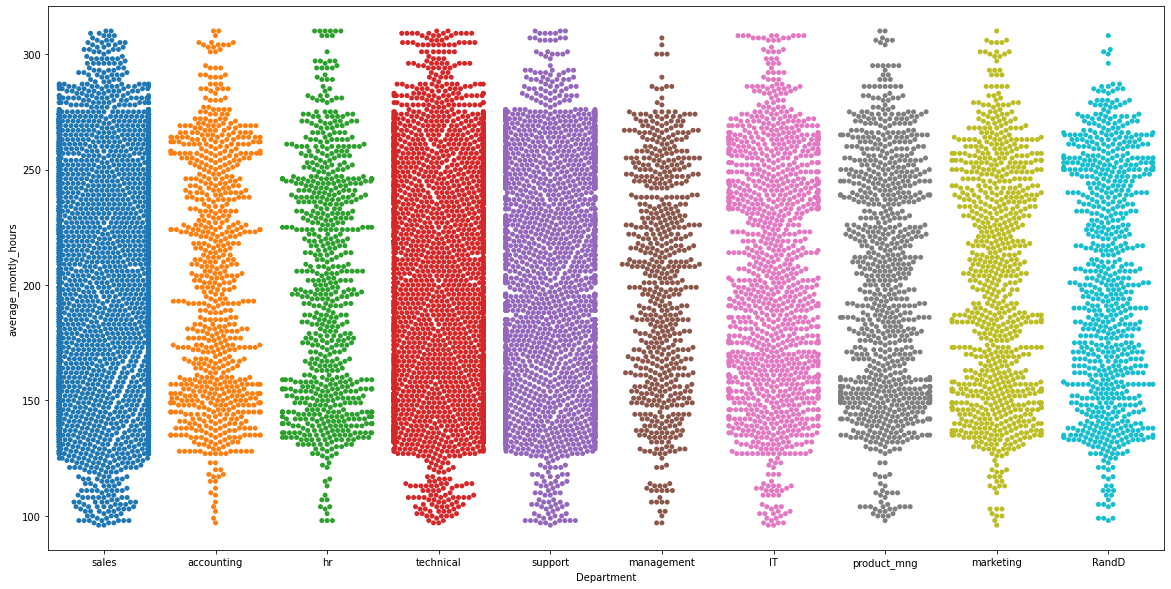

In [13]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (20,10))
sns.swarmplot(x = 'Department', y = 'average_montly_hours', data = df)

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['salary']= label_encoder.fit_transform(df['salary'])
df['salary'].value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

In [15]:
targ_en = df.groupby('Department')['left'].mean()
df = df.merge(targ_en, how = 'left', on = 'Department')
df.drop('Department', axis = 1, inplace = True)
df = df.rename(columns = {'left_x': 'left', 'left_y': 'Department'})

In [16]:
from sklearn.linear_model import LogisticRegression
X = df.drop(['left'],axis = 1)
y = df['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2620,  233],
       [ 683,  214]])

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7557333333333334


# ***TASK 10***

Discuss the concept of One-Hot-Encoding, Multicollinearity and the Dummy Variable Trap.  What is Nominal and Ordinal Variables ?


1. One Hot Encoding is used to convert the categorical variables to numerical ones by adding new columns in the form of dummy or binary variables (0 or 1).

2. Multicollinearity is a concept where one independent variable has a high correlation with another independent variable present in the dataset. This also means using one predictor we can predict the other predictor.

3. Dummy Variable Trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated.

4. Nominal variables are just for the identification purpose. The classes or categories are nowhere superior to others. Ordinal Variables depict some kind of superiority based on the classes. They are arranged in a sequential order.


Salary Dataset of 52 professors having categorical columns. Apply dummy variables concept and one-hot-encoding on categorical columns.

In [20]:
url = "https://data.princeton.edu/wws509/datasets/salary.dat"
df1 = pd.read_csv(url, delim_whitespace = True)

In [21]:
df1['sx'].unique()
var1 = pd.get_dummies(df1['sx'], drop_first = True)
df1 = df1.join(var1) 
df1.drop('sx', axis = 1, inplace = True)

In [22]:
df1['rk'].unique()
label_encoder = preprocessing.LabelEncoder()
df1['rk']= label_encoder.fit_transform(df1['rk'])

In [23]:
df1['dg'].unique()
var3 = pd.get_dummies(df1['dg'], drop_first = True)
df1 = df1.join(var3) 
df1.drop('dg', axis = 1, inplace = True)

In [24]:
df1 = df1[['male','rk', 'yr','masters', 'yd','sl']]
df1 = df1.rename(columns = {'male': 'sx', 'masters': 'dg'})

In [25]:
df1.head()

,sx,rk,yr,dg,yd,sl
0,1,2,25,0,35,36350
1,1,2,13,0,22,35350
2,1,2,10,0,23,28200
3,0,2,7,0,27,26775
4,1,2,19,1,30,33696
